In [1]:
%pylab inline
import pandas as pd
import gc
import fastparquet

Populating the interactive namespace from numpy and matplotlib


In [2]:
feats_score=pd.read_csv("2way_feature_test.csv",index_col=0)

In [3]:
train1=pd.read_csv("../input/newtrain.csv",index_col=0)

In [4]:
train1.shape

(595212, 63)

In [5]:
train1.head()

ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
id                                                                           
7            6           5           2           3           1          10   
9            3           1           3           2           1           9   
13           5           7           1           2           2           9   
16           6           9           1           2           4           7   
17           4           6           0           2           2           6   

    ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10   ...    ps_ind_15  \
id                                                   ...                
7            1          10           1           5   ...           11   
9            5           8           1           7   ...            3   
13           1           8           2           7   ...           12   
16           1           8           4           2   ...            8   
17           3          10           2          12   ...            9   

    ps_ind_16_bin  ps_ind_17_bin  ps_ind_18_bin  ps_ind_6789  ps_reg_01  \
id                                                                        
7               0              1              0            1          7   
9               0              0              1            2          8   
13              1              0              0            2          0   
16              1              0              0            0          9   
17              1              0              0            0          7   

    ps_reg_02  ps_reg_03_A  ps_reg_03_M  target  
id                                               
7           2           19           26       0  
9           4            9           30       0  
13          0           19           51       0  
16          2           13           17       0  
17          6           15           36       0  

[5 rows x 63 columns]

In [6]:
def read_train2():
    cols=c=feats_score[feats_score[feats_score.columns[1]]<0.05].index
    train2 = fastparquet.ParquetFile('../input/newtrain_cat2way_be.parq').to_pandas()
    return train2[cols]
    #print cols

In [7]:
%time train2=read_train2()

CPU times: user 10.7 s, sys: 3.09 s, total: 13.8 s
Wall time: 13.8 s


In [8]:
train2.shape

(595212, 616)

In [9]:
train2.head()

ps_calc_01*ps_car_07_cat  ps_calc_01*ps_car_15  ps_calc_01*ps_ind_03  \
id                                                                         
7                       0.30                  1.60                 -0.07   
9                       0.27                 -1.45                 -0.56   
13                      0.28                  0.26                 -1.73   
16                      0.30                 -1.65                  1.46   
17                      0.26                 -1.67                 -2.18   

    ps_calc_01*ps_ind_07_bin  ps_calc_01*ps_ind_15  ps_calc_01*ps_ind_6789  \
id                                                                           
7                      -1.71                  0.54                   -0.29   
9                       0.58                 -1.25                   -1.24   
13                      0.59                 -0.19                   -1.23   
16                      0.62                  0.80                    1.20   
17                      0.56                 -0.29                    1.13   

    ps_calc_01*ps_reg_01  ps_calc_01*ps_reg_02  ps_calc_01*ps_reg_03_M  \
id                                                                       
7                  -0.42                  1.28                   -0.41   
9                  -0.54                 -0.17                   -0.44   
13                 -1.09                  0.63                    2.06   
16                  1.42                  1.28                   -0.33   
17                 -0.43                 -0.84                   -0.47   

    ps_calc_02*ps_car_01_cat          ...            \
id                                    ...             
7                      -1.19          ...             
9                       0.89          ...             
13                      0.51          ...             
16                      0.50          ...             
17                      0.89          ...             

    ps_ind_18_bin*ps_ind_6789  ps_ind_18_bin*ps_reg_02  \
id                                                       
7                       -0.03                     1.42   
9                       -1.84                    -1.16   
13                      -0.64                     0.83   
16                       1.24                     1.42   
17                       1.24                    -0.58   

    ps_ind_18_bin*ps_reg_03_M  ps_ind_6789*ps_reg_02  ps_ind_6789*ps_reg_03_A  \
id                                                                              
7                       -0.35                   0.05                     1.71   
9                       -0.56                  -0.60                    -0.60   
13                       2.30                  -0.07                     0.94   
16                      -0.27                   2.24                    -0.34   
17                      -0.41                  -0.57                    -0.35   

    ps_ind_6789*ps_reg_03_M  ps_reg_01*ps_reg_03_A  ps_reg_01*ps_reg_03_M  \
id                                                                          
7                     -0.46                  -0.35                  -0.40   
9                     -0.51                  -0.54                  -0.44   
13                     1.11                  -0.11                   0.03   
16                    -0.08                  -0.11                  -0.20   
17                    -0.41                  -0.51                  -0.42   

    ps_reg_02*ps_reg_03_A  ps_reg_02*ps_reg_03_M  
id                                                
7                    3.01                  -0.43  
9                   -0.41                  -0.35  
13                   0.91                   0.87  
16                  -0.34                  -0.00  
17                  -0.48                  -0.48  

[5 rows x 616 columns]

In [10]:
train=pd.concat([train1,train2],axis=1)

In [11]:
columns=[u for u in train.columns if u.startswith('ps_') and not u.endswith("float")]
len(columns)

675

In [24]:
import json
json.dump(columns, open("candidate_columns.txt",'w'))

In [22]:
columns[486]

'ps_car_13*ps_ind_06_bin'

In [20]:
feats_score.loc['ps_ind_15*ps_reg_03_M']

mannwhitneyu:rnd_max0    9.420686e-01
t-test:rnd-mean1-max     4.352012e-23
t-test:rnd-max0-mean     8.985262e-01
Name: ps_ind_15*ps_reg_03_M, dtype: float64

In [12]:
target=train['target'].values

In [13]:
train.head()

ps_calc_01  ps_calc_02  ps_calc_03  ps_calc_04  ps_calc_05  ps_calc_06  \
id                                                                           
7            6           5           2           3           1          10   
9            3           1           3           2           1           9   
13           5           7           1           2           2           9   
16           6           9           1           2           4           7   
17           4           6           0           2           2           6   

    ps_calc_07  ps_calc_08  ps_calc_09  ps_calc_10          ...            \
id                                                          ...             
7            1          10           1           5          ...             
9            5           8           1           7          ...             
13           1           8           2           7          ...             
16           1           8           4           2          ...             
17           3          10           2          12          ...             

    ps_ind_18_bin*ps_ind_6789  ps_ind_18_bin*ps_reg_02  \
id                                                       
7                       -0.03                     1.42   
9                       -1.84                    -1.16   
13                      -0.64                     0.83   
16                       1.24                     1.42   
17                       1.24                    -0.58   

    ps_ind_18_bin*ps_reg_03_M  ps_ind_6789*ps_reg_02  ps_ind_6789*ps_reg_03_A  \
id                                                                              
7                       -0.35                   0.05                     1.71   
9                       -0.56                  -0.60                    -0.60   
13                       2.30                  -0.07                     0.94   
16                      -0.27                   2.24                    -0.34   
17                      -0.41                  -0.57                    -0.35   

    ps_ind_6789*ps_reg_03_M  ps_reg_01*ps_reg_03_A  ps_reg_01*ps_reg_03_M  \
id                                                                          
7                     -0.46                  -0.35                  -0.40   
9                     -0.51                  -0.54                  -0.44   
13                     1.11                  -0.11                   0.03   
16                    -0.08                  -0.11                  -0.20   
17                    -0.41                  -0.51                  -0.42   

    ps_reg_02*ps_reg_03_A  ps_reg_02*ps_reg_03_M  
id                                                
7                    3.01                  -0.43  
9                   -0.41                  -0.35  
13                   0.91                   0.87  
16                  -0.34                  -0.00  
17                  -0.48                  -0.48  

[5 rows x 679 columns]

In [33]:
nv={}
for col in columns:
    s=train[col]
    values= set(s)
    print col, len(values)
    nv[col]=len(values)
    #break

ps_calc_01 10
ps_calc_02 10
ps_calc_03 10
ps_calc_04 6
ps_calc_05 7
ps_calc_06 11
ps_calc_07 10
ps_calc_08 11
ps_calc_09 8
ps_calc_10 26
ps_calc_11 20
ps_calc_12 11
ps_calc_13 14
ps_calc_14 24
ps_calc_15_bin 2
ps_calc_16_bin 2
ps_calc_17_bin 2
ps_calc_18_bin 2
ps_calc_19_bin 2
ps_calc_20_bin 2
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11 5
ps_car_11_cat 104
ps_car_12 10
ps_car_13 11
ps_car_14 11
ps_car_15 15
ps_ind_01 8
ps_ind_02_cat 5
ps_ind_03 12
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_ind_06_bin 2
ps_ind_07_bin 2
ps_ind_08_bin 2
ps_ind_09_bin 2
ps_ind_10_bin 2
ps_ind_11_bin 2
ps_ind_12_bin 2
ps_ind_13_bin 2
ps_ind_14 5
ps_ind_15 14
ps_ind_16_bin 2
ps_ind_17_bin 2
ps_ind_18_bin 2
ps_ind_6789 4
ps_reg_01 10
ps_reg_02 19
ps_reg_03_A 31
ps_reg_03_M 298
ps_calc_01*ps_car_07_cat 10
ps_calc_01*ps_car_15 75
ps_calc_01*ps_ind_03 75
ps_calc_01*ps_ind_07_bin 10
ps_calc_01*

In [34]:
nv=pd.Series(nv)

In [37]:
nv[nv>255]

ps_reg_03_M    298
dtype: int64

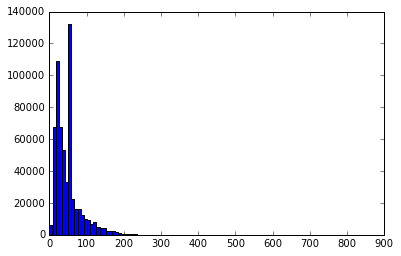

In [38]:
plt.hist(train['ps_reg_03_M'],bins=100);

In [14]:
s=train['ps_reg_03_M'].copy()

In [15]:
s[s>400]=400
s[(s<400)&(s>300)]=300
s[(s<300)&(s>250)]=250

In [16]:
train['ps_reg_03_M']=s

In [17]:
train['ps_reg_03_M'].value_counts().sort_index().shape 

(249,)

In [18]:
newtrain=pd.DataFrame(index=train.index,columns=columns)

In [19]:
newtrain.shape,len(columns)

((595212, 675), 675)

In [20]:
import gc
gc.collect()

9570

In [21]:
for col in columns:
    s=train[col]
    values=sorted(list(set(s)))
    vd=dict([ (v,i) for i,v in enumerate(values)])
    print col, len(values)
    assert(len(values)<255)
    news=s.map(lambda u: vd[u]).astype(np.int32)
    newtrain[col]=news
    #break

ps_calc_01 10
ps_calc_02 10
ps_calc_03 10
ps_calc_04 6
ps_calc_05 7
ps_calc_06 11
ps_calc_07 10
ps_calc_08 11
ps_calc_09 8
ps_calc_10 26
ps_calc_11 20
ps_calc_12 11
ps_calc_13 14
ps_calc_14 24
ps_calc_15_bin 2
ps_calc_16_bin 2
ps_calc_17_bin 2
ps_calc_18_bin 2
ps_calc_19_bin 2
ps_calc_20_bin 2
ps_car_01_cat 13
ps_car_02_cat 3
ps_car_03_cat 3
ps_car_04_cat 10
ps_car_05_cat 3
ps_car_06_cat 18
ps_car_07_cat 3
ps_car_08_cat 2
ps_car_09_cat 6
ps_car_10_cat 3
ps_car_11 5
ps_car_11_cat 104
ps_car_12 10
ps_car_13 11
ps_car_14 11
ps_car_15 15
ps_ind_01 8
ps_ind_02_cat 5
ps_ind_03 12
ps_ind_04_cat 3
ps_ind_05_cat 8
ps_ind_06_bin 2
ps_ind_07_bin 2
ps_ind_08_bin 2
ps_ind_09_bin 2
ps_ind_10_bin 2
ps_ind_11_bin 2
ps_ind_12_bin 2
ps_ind_13_bin 2
ps_ind_14 5
ps_ind_15 14
ps_ind_16_bin 2
ps_ind_17_bin 2
ps_ind_18_bin 2
ps_ind_6789 4
ps_reg_01 10
ps_reg_02 19
ps_reg_03_A 31
ps_reg_03_M 249
ps_calc_01*ps_car_07_cat 10
ps_calc_01*ps_car_15 75
ps_calc_01*ps_ind_03 75
ps_calc_01*ps_ind_07_bin 10
ps_calc_01*

In [22]:
newtrain['target']=train['target'].astype(np.int32)

In [23]:
newtrain.to_csv("../input/if_sel_input.csv")